In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input/lt-vehicle-loan-default-prediction'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/lt-vehicle-loan-default-prediction/data_dictionary.csv
/kaggle/input/lt-vehicle-loan-default-prediction/train.csv
/kaggle/input/lt-vehicle-loan-default-prediction/test.csv


In [2]:
import numpy as np # linear algebra
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
df =pd.read_csv('/kaggle/input/lt-vehicle-loan-default-prediction/train.csv')
df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [4]:
df.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   Date.of.Birth                        233154 non-null  object 
 9   Employment.Type                      225493 non-null  object 
 10  DisbursalDate                        233154 non-null  object 
 11  State_ID     

In [6]:
# replace "." with "_" in column names
df.columns = df.columns.str.replace('.', '_', regex=False)


In [7]:
df.isna().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date_of_Birth                             0
Employment_Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS_SCORE                         0
PERFORM_CNS_SCORE_DESCRIPTION             0
PRI_NO_OF_ACCTS                           0
PRI_ACTIVE_ACCTS                

In [8]:
df['Employment_Type'] = df['Employment_Type'].fillna('Unknown')
df['Employment_Type'].value_counts()

Self employed    127635
Salaried          97858
Unknown            7661
Name: Employment_Type, dtype: int64

In [9]:
df['Date_of_Birth']= pd.to_datetime(df['Date_of_Birth'], format='%d-%m-%y')
df['DisbursalDate']= pd.to_datetime(df['DisbursalDate'], format='%d-%m-%y')
df['branch_id'] = df['branch_id'].astype('category')
df['supplier_id'] =df['supplier_id'].astype('category')
df['manufacturer_id'] = df['manufacturer_id'].astype('category')
df['Current_pincode_ID'] =df['Current_pincode_ID'].astype('category')
df['Employment_Type'] = df['Employment_Type'].astype('category')
df['State_ID'] = df['State_ID'].astype('category')
df['Employee_code_ID'] = df['Employee_code_ID'].astype('category')
df['PERFORM_CNS_SCORE_DESCRIPTION'] = df['PERFORM_CNS_SCORE_DESCRIPTION'].astype('category')
df['loan_defaults']= df['loan_default'].astype('category')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 42 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   UniqueID                             233154 non-null  int64         
 1   disbursed_amount                     233154 non-null  int64         
 2   asset_cost                           233154 non-null  int64         
 3   ltv                                  233154 non-null  float64       
 4   branch_id                            233154 non-null  category      
 5   supplier_id                          233154 non-null  category      
 6   manufacturer_id                      233154 non-null  category      
 7   Current_pincode_ID                   233154 non-null  category      
 8   Date_of_Birth                        233154 non-null  datetime64[ns]
 9   Employment_Type                      233154 non-null  category      
 

In [11]:
# No correlation 
df= df.drop(['MobileNo_Avl_Flag'], axis=1)

df = df.drop(['supplier_id', 'Current_pincode_ID'], axis=1)
# possibly the following should be removed
df = df.drop(['UniqueID','branch_id', 'manufacturer_id', 'Employee_code_ID', 'State_ID'], axis=1)

<AxesSubplot:xlabel='loan_default', ylabel='Count'>

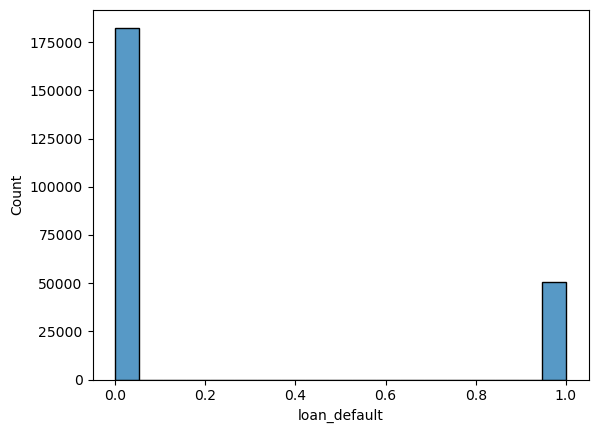

In [12]:
sns.histplot(df['loan_default'])

**A Higher values are present of non defaultees than  defaultees**

> Marking categorical values and how it's gonna be of any help

In [13]:
# function to change age string to number of months
def time_to_months(age):
    age_year, age_month  = age.split(' ')
    age_year = int(age_year.replace('yrs', ''))
    age_month = int(age_month.replace('mon', ''))
    return age_year * 12 + age_month

In [14]:
# convert AVERAGE.ACCT.AGE and CREDIT.HISTORY.LENGTH to numeric
df['AVERAGE_ACCT_AGE_MONTHS'] = df['AVERAGE_ACCT_AGE'].apply(time_to_months)
df['CREDIT_HISTORY_LENGTH_MONTHS'] = df['CREDIT_HISTORY_LENGTH'].apply(time_to_months)
# remove transformed cols
df = df.drop(['AVERAGE_ACCT_AGE','CREDIT_HISTORY_LENGTH'], axis=1)

In [15]:
df["loan_default"].value_counts()

0    182543
1     50611
Name: loan_default, dtype: int64

In [16]:
df.columns

Index(['disbursed_amount', 'asset_cost', 'ltv', 'Date_of_Birth',
       'Employment_Type', 'DisbursalDate', 'Aadhar_flag', 'PAN_flag',
       'VoterID_flag', 'Driving_flag', 'Passport_flag', 'PERFORM_CNS_SCORE',
       'PERFORM_CNS_SCORE_DESCRIPTION', 'PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS',
       'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT',
       'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS',
       'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT',
       'SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT',
       'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS',
       'NO_OF_INQUIRIES', 'loan_default', 'loan_defaults',
       'AVERAGE_ACCT_AGE_MONTHS', 'CREDIT_HISTORY_LENGTH_MONTHS'],
      dtype='object')

In [17]:
categorical_cols = df.select_dtypes(include=['category']).columns
categorical_df = df[categorical_cols]
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
numeric_df = df[numeric_cols]

In [18]:
numeric_df.columns

Index(['disbursed_amount', 'asset_cost', 'ltv', 'Aadhar_flag', 'PAN_flag',
       'VoterID_flag', 'Driving_flag', 'Passport_flag', 'PERFORM_CNS_SCORE',
       'PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS',
       'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT',
       'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS', 'SEC_OVERDUE_ACCTS',
       'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT', 'SEC_DISBURSED_AMOUNT',
       'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT', 'NEW_ACCTS_IN_LAST_SIX_MONTHS',
       'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'NO_OF_INQUIRIES',
       'loan_default', 'AVERAGE_ACCT_AGE_MONTHS',
       'CREDIT_HISTORY_LENGTH_MONTHS'],
      dtype='object')

<AxesSubplot:>

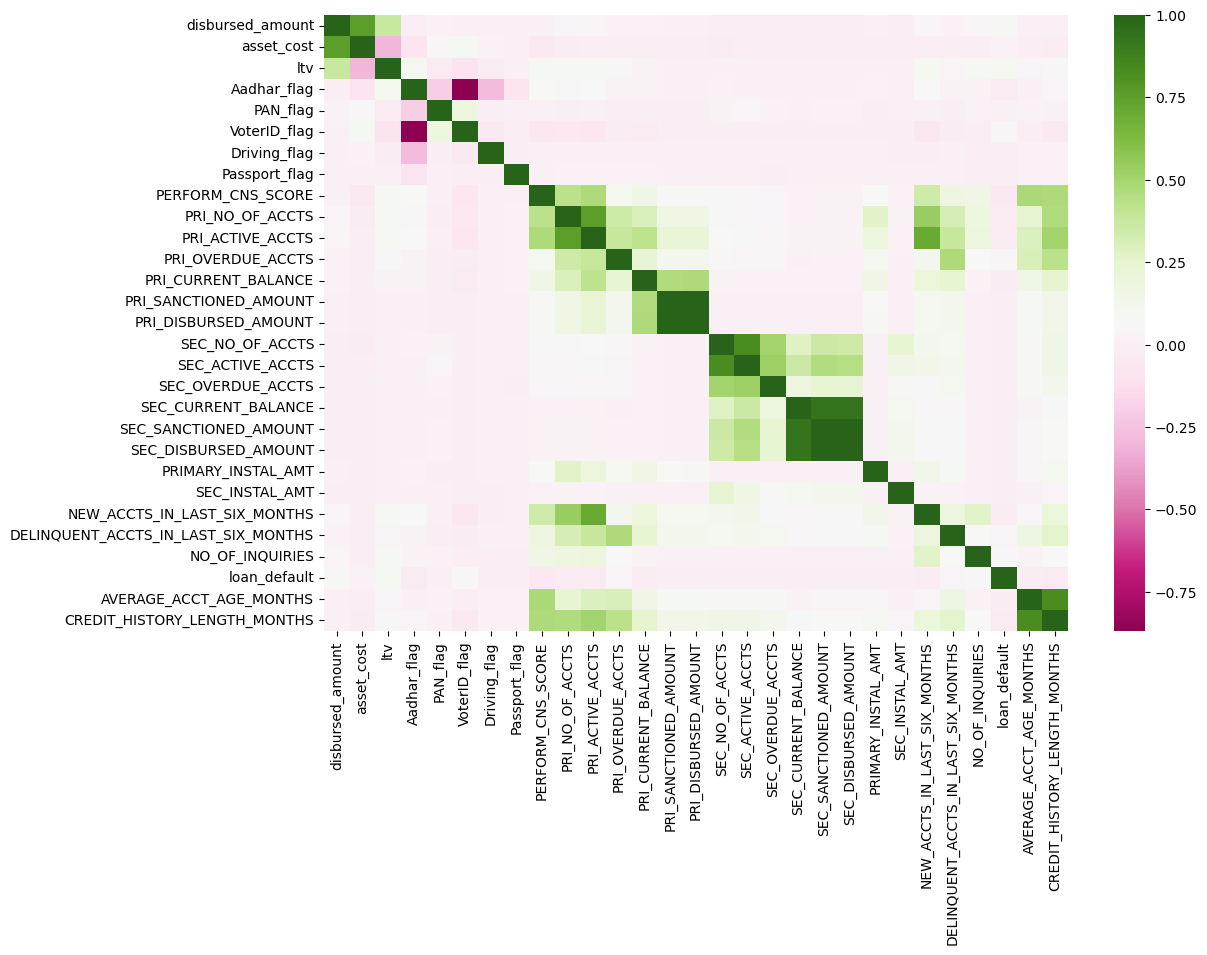

In [19]:
#numeric_df= numeric_df.drop(['UniqueID','VoterID_flag', 'Driving_flag', 'Passport_flag','SEC_SANCTIONED_AMOUNT'],axis=1)
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(),cmap="PiYG")

# Numeric Columns Analysis

**Visualizing to get data insights**

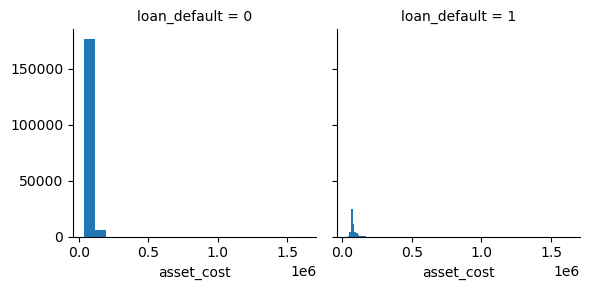

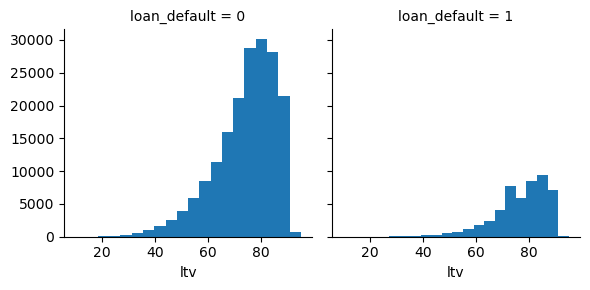

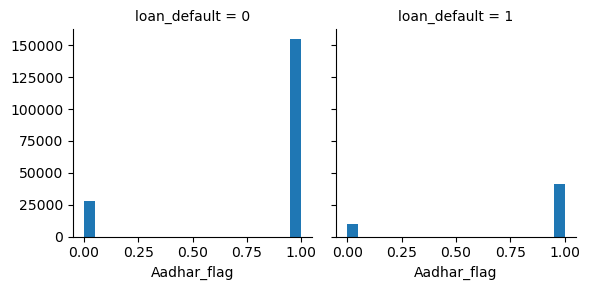

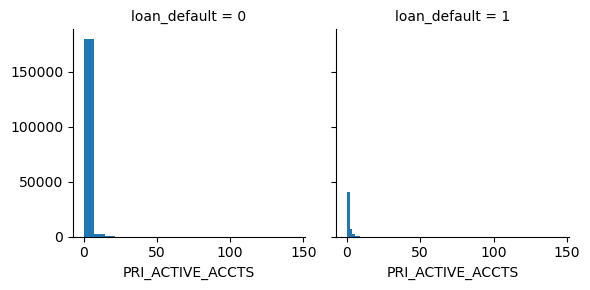

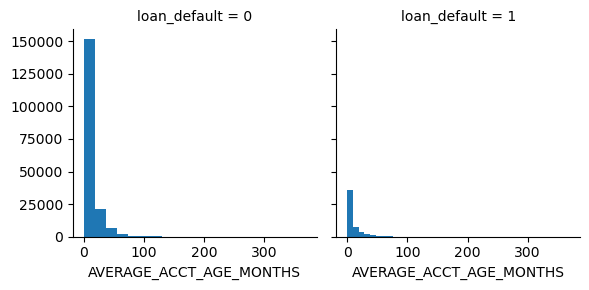

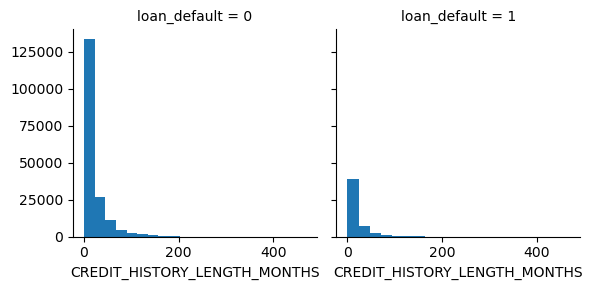

In [20]:
# Numeric Columns of interest
num_interest_cols = ['asset_cost', 'ltv', 'Aadhar_flag', 'PRI_ACTIVE_ACCTS', 'AVERAGE_ACCT_AGE_MONTHS', 'CREDIT_HISTORY_LENGTH_MONTHS']
for column in num_interest_cols:
    g = sns.FacetGrid(numeric_df, col='loan_default')
    g.map(plt.hist, column, bins=20)

# Categorical Data

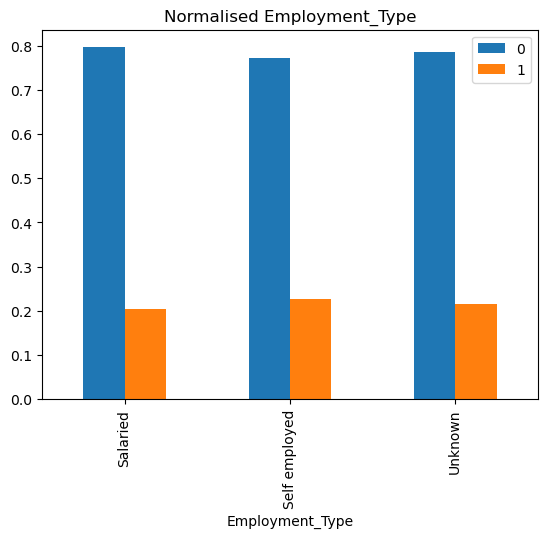

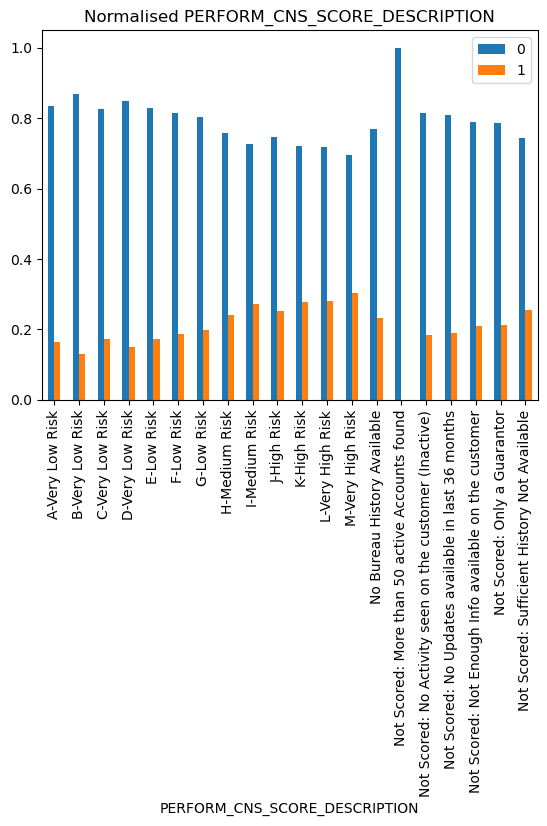

In [21]:
# Categorical Columns of interest
cat_interest_cols = ['Employment_Type', 'PERFORM_CNS_SCORE_DESCRIPTION']
for column in cat_interest_cols:
    categorical_df.groupby(column)['loan_defaults'].value_counts(normalize=True).unstack().plot.bar()
    plt.title(f"Normalised {column}")
    plt.show()

# Prepare our data so we can start applying ML algorithms

In [24]:
train_df=['asset_cost', 'ltv', 'Aadhar_flag', 'PRI_ACTIVE_ACCTS', 'AVERAGE_ACCT_AGE_MONTHS', 'CREDIT_HISTORY_LENGTH_MONTHS','Employment_Type', 'PERFORM_CNS_SCORE_DESCRIPTION']